# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box


pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data', 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
# calling dataframes
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

## Prepare Alaska Multipolygon

Examine data:

In [5]:
print(f"CRS: {states.crs}")
states.head()

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


<Axes: >

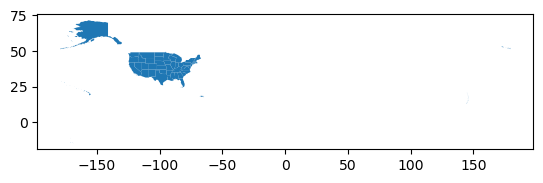

In [6]:
states.plot()

## We are interested in Alaska data only.

<Axes: >

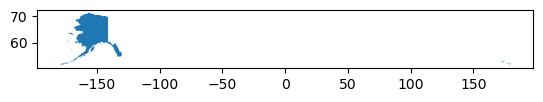

In [7]:
alaska = states[states['name'] == 'Alaska']
alaska.plot()

## Reproject to CRS optimized for Alaska

In [ ]:
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected?', alaska.crs.is_projected)

alaska.crs # Look at bounds

Is this CRS projected? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

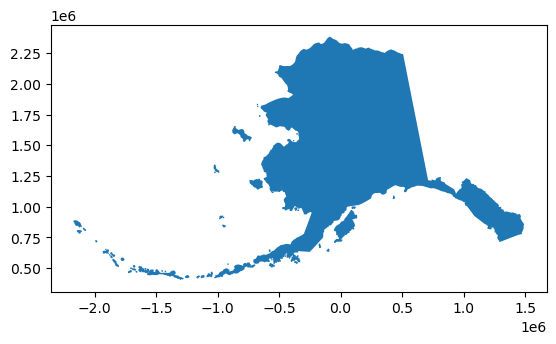

In [13]:
alaska.plot()

## Prepare populated places points

Explore the data.

In [17]:
print("CRS:", places.crs)


places.head()

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<Axes: >

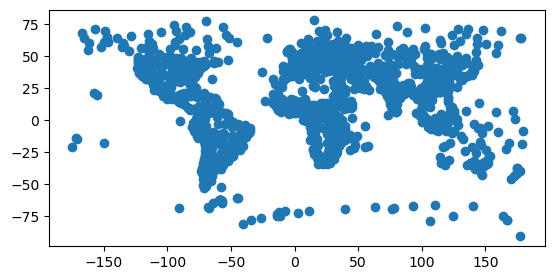

In [16]:
places.plot()

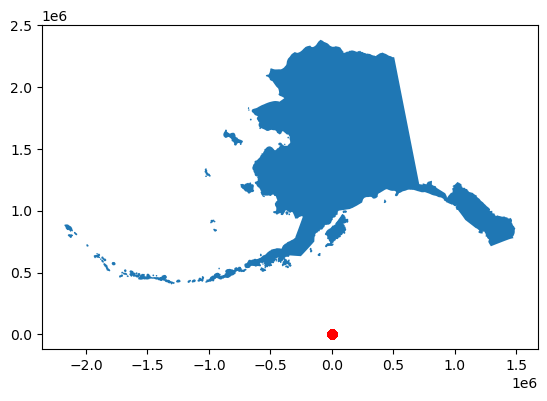

In [19]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color = 'red')

plt.show()

# What is wrong with the plot?

Data is in werid places, CRS may be different on both datasets.

To plot, analyze, or integrate different geospatial datasets they **must have the same CRS**

In [20]:
alaska.crs == places.crs

False

## Check-in

Reproject the `places` geo-dataframe into `alaska` CRS and verify the CRSs match using using `assert`

In [ ]:
places = places.to_crs('epsg: 3338')
assert places.crs == alaska.crs

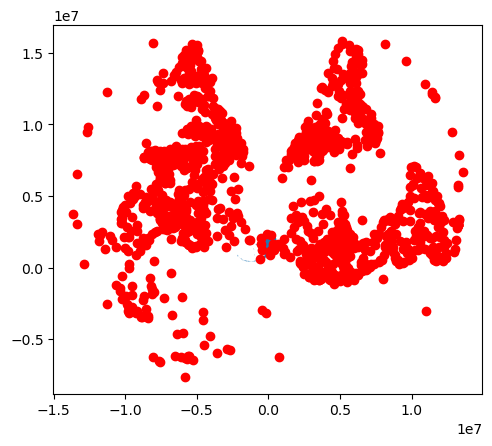

In [ ]:
# Let's Plot It

fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color = 'red')

plt.show()

## Clipping

**Clipping** means using a polygon(s) to only select data within it.

Syntax:
```
updated_geodf = geopandas.clip(geodf, mask)
```
Where:
`updated_geodf` = intersection of the geometries in `geodf` with `mask`
`mask` = `geodDataFrame` with the polygons you want to use for clipping.

**Make sure the CRS's for `mask` and `geodf` match.

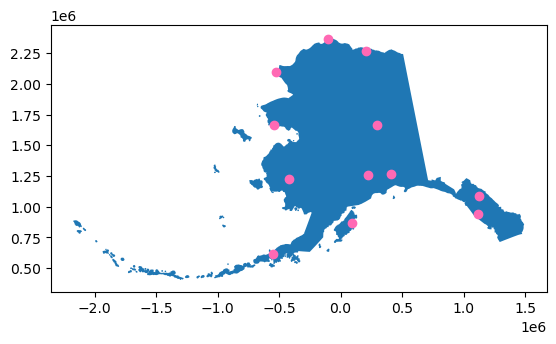

In [26]:
# Clip populated places to Alaska Multipolygon

ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color = 'hotpink')

plt.show()

## Prepare Roads

Examine Roads Dataset

In [27]:
print('CRS:', roads.crs)
roads.head()

CRS: EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,0,17,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,0,33,1,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


<Axes: >

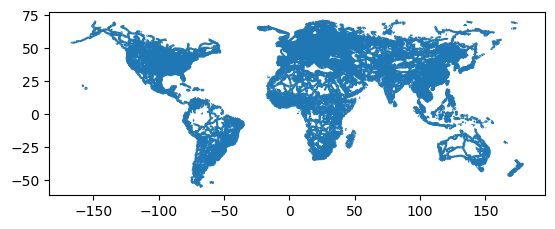

In [28]:
roads.plot()

### Before jumping into reprojecting and clipping, we will subset the data to select only US roads

- with spatial data: Try to reduce the dataset, into tabular before applying any geospatial transformation

In [32]:
usa_roads = roads[roads['sov_a3'] == 'USA']

usa_roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (4030832.045 932135.650, 4030597.15..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (5327911.145 1418559.409, 5335611.0..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,0,17,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (4574614.410 1853201.688, 4581786.4..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,0,33,1,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((5560833.584 2598363.028, 555..."
6,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",85,None,None,None,0,138,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,81005,North America,0,Federal,7.1,9.0,"LINESTRING (3797513.184 695639.714, 3795846.87..."


In [33]:
# Clip usa_roads to Alaska geometry

ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


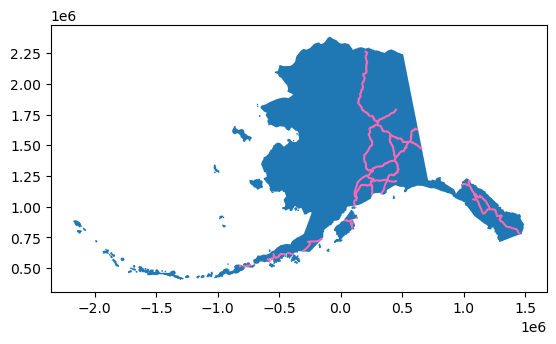

In [35]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color = 'hotpink')

plt.show()

## Clipping with a Bounding Box

We will clip the `usa_roads` geo-df with the **bounding box** of `alaska` instead of the polygons.

We will create the bounding box with `box()` function from `shapely`.

WE constructed a box by passing 4 numbers into `box()`:

`box(minx,miny,maxx,maxy)`

`*` unpacking shortcut, and passing numbers 

In [38]:
# Represent Xmin,Xmax, Ymin,Ymax
alaska.total_bounds 
# the total bounds are from the reprojected crs

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

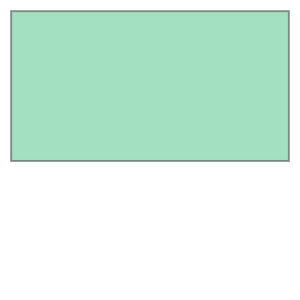

In [40]:
box(-2175729.73162241,   404545.10791528,  1493082.30904445, 2383808.43520815)

<class 'shapely.geometry.polygon.Polygon'>


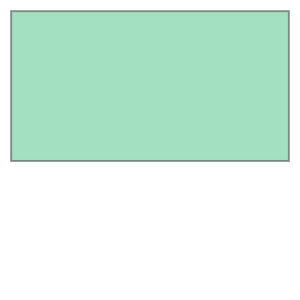

In [39]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

`*` = Unpacking operator

Think about it as "upacking" the elements in `alaska.total_bounds` and assigning them one-by-one to the parameters `minx`, `miny`, `maxx`, `maxy` of the `box()` function

In [41]:
print(['a', 'b', 'c'])
print(*['a', 'b', 'c'])


['a', 'b', 'c']
a b c


In [42]:
# Create geo-dataframe from Alaska bounding box

ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # Assign geometry column
                           crs = alaska.crs) # Assign CRS

<Axes: >

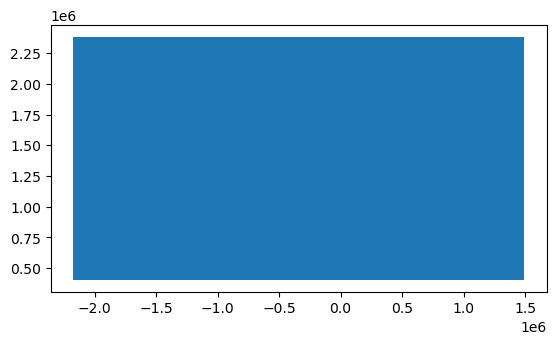

In [43]:
ak_bbox.plot()

# Clip the roads using Alaska bounding box

In [46]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

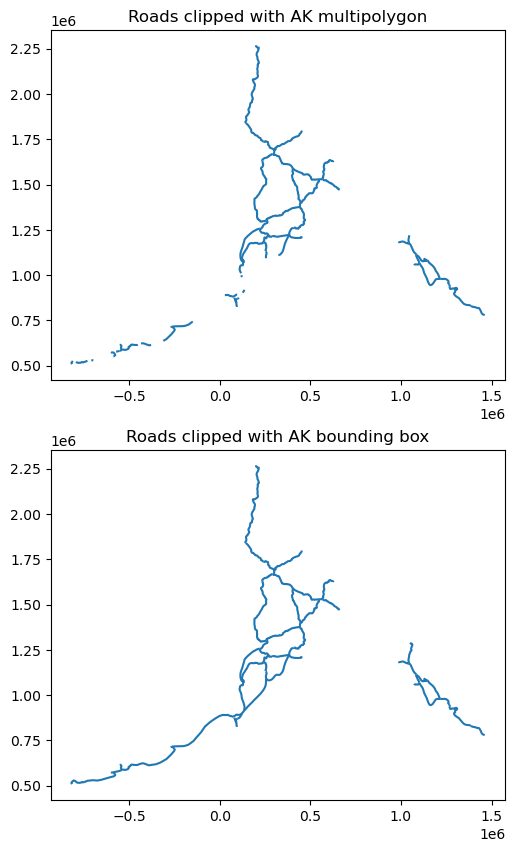

In [49]:
# Compare both clipping methods

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

## Create a map

Text(0.5, 1.0, 'Road Networks and Major Cities in Alaska')

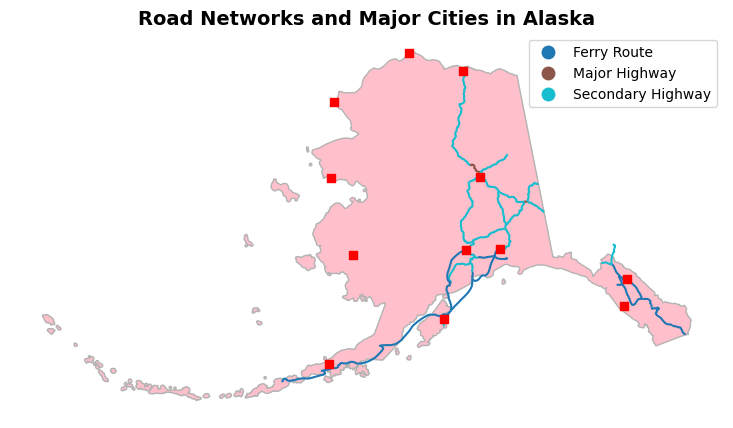

In [53]:
fig, ax = plt.subplots(figsize= (11,5))

ax.axis('off')

alaska.plot(ax=ax, color = 'pink', edgecolor = '0.7')

ak_complete_roads.plot(ax=ax,
                       zorder = 1, # Specify layer plotting order
                       column = 'type',
                       legend = True)

ak_places.plot(ax=ax,
               zorder = 2, # Specify layer plotting order
               color= 'red',
               marker = 's' # Square marker
               )

ax.set_title('Road Networks and Major Cities in Alaska', fontsize = 14, fontweight = 'bold')

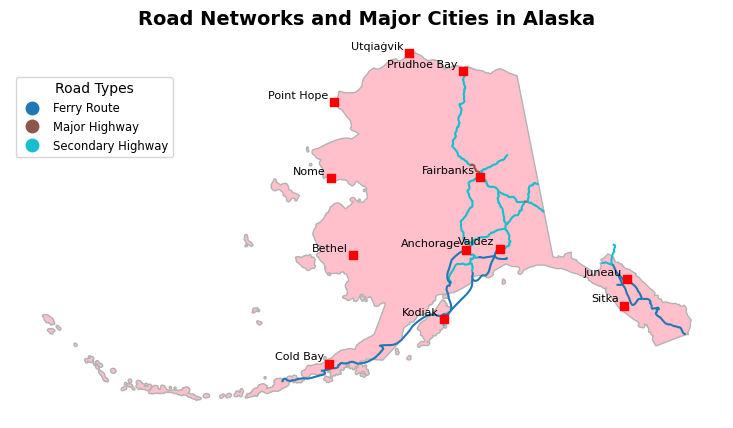

In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='pink', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       # Legend Location
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )


# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    # Add text on specific coordinate
    ax.text(x-30000, y+20000, # Buffers- position names to the left of the points
            name,  #name of 
            fontsize=8, # Size of font
            ha='right') # horizontal axis

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Iterating over x,y 
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    # Add text on specific coordinate
    ax.text(x-30000, y+20000, 
            name, 
            fontsize=8, # Size of font
            ha='right') # horizontal axis

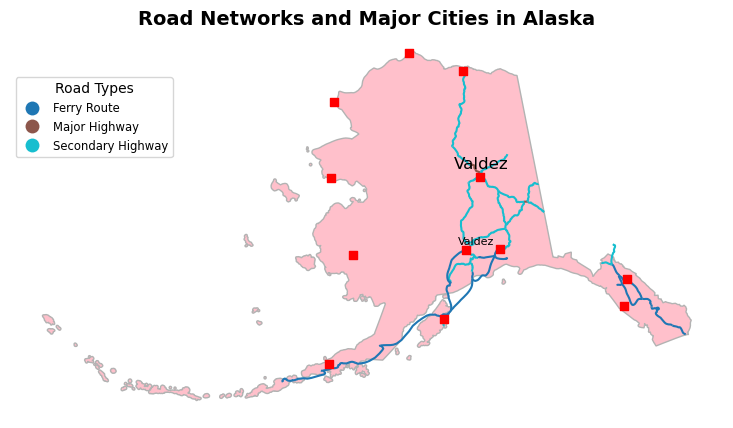

In [68]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='pink', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       # Legend Location
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )


# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name == 'Valdez':
        ax.text(x+50000, y+450000, 
            name, 
            fontsize=12, 
            ha='right') 
else:
        ax.text(x-30000, y+20000, 
            name, 
            fontsize=8, # Size of font
            ha='right') # horizontal axis
    


ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()